<a href="https://colab.research.google.com/github/sanjeevKaruppaiah/mlops-project-image-classification/blob/main/anomaly_defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anamoly defect detection**


In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

In [2]:
os.getcwd
os.listdir

<function posix.listdir(path=None)>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nexuswho/fabric-defects-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.09G/2.09G [01:17<00:00, 28.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1


In [4]:
import os

# List the contents of the dataset directory
dataset_contents = os.listdir(path)
print("Contents of the dataset directory:")
for item in dataset_contents:
    print(item)

# Identify subdirectories (defect types)
defect_types = [item for item in dataset_contents if os.path.isdir(os.path.join(path, item))]
print("\nIdentified defect types (subdirectories):")
for defect_type in defect_types:
    print(defect_type)

Contents of the dataset directory:
Fabric Defects Dataset

Identified defect types (subdirectories):
Fabric Defects Dataset


**Reasoning**:
Based on the previous output, the dataset seems to be within a single subdirectory named "Fabric Defects Dataset". I need to list the contents of this subdirectory to find the actual defect type folders.



In [5]:
# List the contents of the 'Fabric Defects Dataset' subdirectory
dataset_subdir_path = os.path.join(path, "Fabric Defects Dataset")
subdir_contents = os.listdir(dataset_subdir_path)
print(f"Contents of the '{dataset_subdir_path}' directory:")
for item in subdir_contents:
    print(item)

# Identify the actual defect types (subdirectories) within this subdirectory
actual_defect_types = [item for item in subdir_contents if os.path.isdir(os.path.join(dataset_subdir_path, item))]
print("\nIdentified actual defect types (subdirectories):")
for defect_type in actual_defect_types:
    print(defect_type)

Contents of the '/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset' directory:
Fabric Defect Dataset

Identified actual defect types (subdirectories):
Fabric Defect Dataset


In [6]:
# List the contents of the 'Fabric Defect Dataset' subdirectory
actual_dataset_path = os.path.join(dataset_subdir_path, "Fabric Defect Dataset")
final_subdir_contents = os.listdir(actual_dataset_path)
print(f"Contents of the '{actual_dataset_path}' directory:")
for item in final_subdir_contents:
    print(item)

# Identify the final subdirectories (defect types) within this subdirectory
final_defect_types = [item for item in final_subdir_contents if os.path.isdir(os.path.join(actual_dataset_path, item))]
print("\nIdentified final defect types (subdirectories):")
for defect_type in final_defect_types:
    print(defect_type)

Contents of the '/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset' directory:
defect free
horizontal
stain
hole
Vertical
lines

Identified final defect types (subdirectories):
defect free
horizontal
stain
hole
Vertical
lines


In [7]:
# Define the base path to the dataset
base_path = os.path.join(path, "Fabric Defects Dataset", "Fabric Defect Dataset")

# Create an empty dictionary to store the counts for each category
defect_counts = {}

# Iterate through the final defect type directories and count images
for defect_type in final_defect_types:
    defect_type_path = os.path.join(base_path, defect_type)
    # List contents and count files (assuming all files are images)
    image_count = len([f for f in os.listdir(defect_type_path) if os.path.isfile(os.path.join(defect_type_path, f))])
    defect_counts[defect_type] = image_count

# Print the counts for each category
print("Image counts per defect category:")
for defect_type, count in defect_counts.items():
    print(f"{defect_type}: {count}")

Image counts per defect category:
defect free: 1666
horizontal: 136
stain: 398
hole: 281
Vertical: 101
lines: 157


## Create pie chart



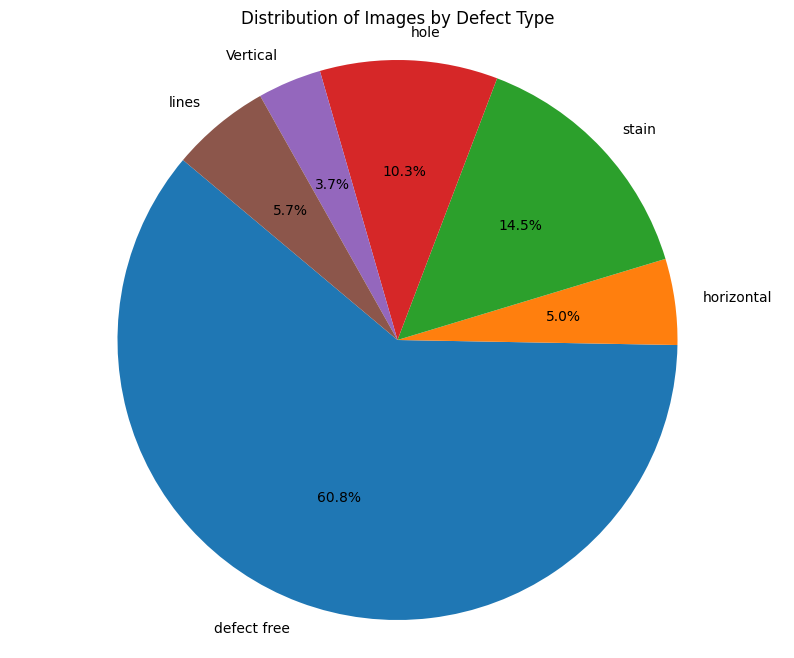

In [8]:
labels = list(defect_counts.keys())
sizes = list(defect_counts.values())

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Defect Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
# Define the base path to the dataset
import os

# Path to your main dataset folder
dataset_path = actual_dataset_path  # or you can put your path as a string

# Loop through all folders and subfolders
for root, dirs, files in os.walk(dataset_path):
    print(f"\n📁 Directory: {root}")

    # Filter only image files (optional but helpful)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    # Take only the first 10 images
    sample_images = image_files[:10]

    # Print their full paths
    for file in sample_images:
        print(os.path.join(root, file))



📁 Directory: /root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset

📁 Directory: /root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/b47521fe91d32d131237314166.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/cb517698953d241c1459414262.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/aae0b4e39aa164131423397602.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/14d58c5898f6e48b0928452216.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/vers

In [10]:
sample_image_path = "/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/24b241d52a57821c1056066074.jpg"
img = Image.open(sample_image_path)
print(img.size)

(2446, 1000)


In [11]:
from torchvision.transforms import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

    #assuming "image"is a PIL image object
    #apply the defined transformation pipeline to the image
img=transform(img)
print(img.shape)

torch.Size([3, 224, 224])


In [12]:
#from PIL import Image
#from torchvision.transforms import transforms
#import os
#import kagglehub

# Download latest version
path = kagglehub.dataset_download("nexuswho/fabric-defects-dataset")

# Define the base path to the dataset
base_path = os.path.join(path, "Fabric Defects Dataset", "Fabric Defect Dataset")
sample_image_path = os.path.join(base_path, "defect free", "24b241d52a57821c1056066074.jpg")

# Load and transform the image
img = Image.open(sample_image_path)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
img = transform(img)

# Calculate and print memory usage
memory_usage = img.numel() * img.element_size()
print(memory_usage * 27 // 1024)

15876


In [13]:
base_path = os.path.join(path, "Fabric Defects Dataset", "Fabric Defect Dataset")
sample_image_path = os.path.join(base_path, "defect free", "24b241d52a57821c1056066074.jpg")

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# actual_dataset_path = '/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator for training and validation
# We'll use a validation split to create a validation set from the training data
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    validation_split=0.2    # Split 20% of data for validation
)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    actual_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical', # Or 'binary' if you have only two classes
    subset='training'       # Specify this is the training subset
)

# Create the validation data generator
validation_generator = datagen.flow_from_directory(
    actual_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical', # Or 'binary' if you have only two classes
    subset='validation'     # Specify this is the validation subset
)

print("Data loaders created successfully!")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")

Found 2193 images belonging to 6 classes.
Found 546 images belonging to 6 classes.
Data loaders created successfully!
Training samples: 2193
Validation samples: 546
Class indices: {'Vertical': 0, 'defect free': 1, 'hole': 2, 'horizontal': 3, 'lines': 4, 'stain': 5}


In [24]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Print the names of the layers in the model
print("Layers in the ResNet50 model:")
for layer in resnet_model.layers:
  print(layer.name)

Layers in the ResNet50 model:
input_layer_5
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_bl

In [32]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Access a specific layer by name
layer_name = 'conv5_block3_3_conv'
try:
    layer = resnet_model.get_layer(layer_name)
    print(f"Successfully accessed layer: {layer.name}")
except ValueError:
    print(f"Layer with name '{layer_name}' not found in the model.")

Successfully accessed layer: conv5_block3_3_conv


To extract features from an intermediate layer in Keras, you can create a new model that takes the same input as your base model but specifies the desired intermediate layer's output as its output.

In [33]:
from tensorflow.keras.models import Model

# Define the name of the intermediate layer you want to extract features from
# You can get layer names from the output of resnet_model.summary() or by iterating through resnet_model.layers
intermediate_layer_name = 'conv5_block3_out' # Example layer name

# Create a new model that outputs the specified intermediate layer's output
try:
    feature_extractor_model = Model(inputs=resnet_model.input,
                                    outputs=resnet_model.get_layer(intermediate_layer_name).output)

    print(f"Feature extractor model created, outputting from layer: {intermediate_layer_name}")
    feature_extractor_model.summary()

except ValueError:
    print(f"Layer with name '{intermediate_layer_name}' not found in the model.")

Feature extractor model created, outputting from layer: conv5_block3_out


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [38]:
from tensorflow.keras.models import Model

# Define the name of the intermediate layer you want to extract features from
intermediate_layer_name = 'conv5_block3_out'

# Create a new model that outputs the specified intermediate layer's output
try:
    feature_extractor_model = Model(inputs=resnet_model.input,
                                    outputs=resnet_model.get_layer(intermediate_layer_name).output)

    print(f"Feature extractor model created, outputting from layer: {intermediate_layer_name}")
    feature_extractor_model.summary()

except ValueError:
    print(f"Layer with name '{intermediate_layer_name}' not found in the model.")

Feature extractor model created, outputting from layer: conv5_block3_out


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_14[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)